# Jim's Take on Python Math Basics

## Python math built-ins: `min()`, `max()`, `pow()`, `...`

In [ ]:
# Python has some built-in math functions
x = min(5, 10, 25)
y = max(5, 10, 25)

print(x)
print(y)

In [ ]:
x = abs(-7.25)

print(x)

In [ ]:
x = pow(4, 3)

print(x)

In [ ]:
import math

x = math.sqrt(64)

print(x)

## Python `math` package

In [ ]:
import math

x = math.ceil(1.4)
y = math.floor(1.4)

print(x)  # returns 2
print(y)  # returns 1

## `numpy` the magnificent

In [ ]:
import numpy as np

b = np.array([[1, 2, 3], [4, 5, 6]])  # Create a rank 2 array
print(f"shape: {b.shape}\n"
      f"values:\n{b}")

In [23]:
c = np.array([[[1, 2, 3], [4, 5, 6], [4, 5, 6]], [[7, 8, 9], [4, 5, 6], [10, 11, 12]]])

print(f"shape: {c.shape}\n"
      f"values:\n{c}")
print(f"ndim: {c.ndim}")
print(f"size: {c.size}")
print(f"dtype: {c.dtype}")
print(f"itemsize: {c.itemsize} bytes")
print(f"nbytes: {c.nbytes}")
print(f"data: {c.data}")
print(f"value at index [0,0,0]: {c[1,0,0]}")


shape: (2, 3, 3)
values:
[[[ 1  2  3]
  [ 4  5  6]
  [ 4  5  6]]

 [[ 7  8  9]
  [ 4  5  6]
  [10 11 12]]]
ndim: 3
size: 18
dtype: int64
itemsize: 8 bytes
nbytes: 144
data: <memory at 0x15d470c70>
value at index [0,0,0]: 7


## Re-entering the matrix: hand-coded matrix `mult()` and `dot()`

Some basic matrix math. I've implemented a mult and a dot product as an exercise to refresh my memory on linear algebra.

In [ ]:
from jkcsoft.math import jymath
import importlib

importlib.reload(jymath)

x = np.array([[1,2],[3,4],[5,6]], dtype=np.float64)
y = np.array([[5,6,7],[7,8,9]], dtype=np.float64)

print(f"x: {x}\ny: {y}")
print(f"x shape: {x.shape} x[0] shape: {x[0].shape} ")
print(f"x ndim: {x.ndim} x[0] ndim: {x[0].ndim} ")

prod = jymath.matrix_multiply(x, y)

print(f"Product:\n{prod}")

np_prod = np.matmul(x, y)

print(f"Numpy Product:\n{np_prod}")


## `SciPy`

### `scipy.constants`: Universal constants

In [ ]:
from scipy.constants import pi, golden, e, c, h, G, g, Avogadro, Boltzmann

# Mathematical constants
print(f"Pi: {pi}")  # The ratio of a circle's `1circumference to its diameter
print(f"Golden Ratio: {golden}")  # (1 + sqrt(5)) / 2, appears in various natural patterns
print(f"Euler's Number: {e}")  # Base of the natural logarithm, approximately 2.718

# Physical constants
print(f"Speed of Light (c): {c} m/s")  # The speed at which light propagates in a vacuum
print(f"Planck's Constant (h): {h} J·s")  # Relates the energy of a photon to its frequency
print(f"Gravitational Constant (G): {G} m^3/kg/s^2")  # Describes the strength of gravitation
print(f"Acceleration due to Gravity (g): {g} m/s^2")  # Standard acceleration of free fall on Earth

# Scientific constants
print(f"Avogadro's Number: {Avogadro} 1/mol")  # Number of constituent particles per mole of a substance
print(f"Boltzmann Constant: {Boltzmann} J/K")  # Relates the average kinetic energy of particles to temperature

### `scipy.differentiate`

In [ ]:

import numpy as np
from scipy.differentiate import derivative

# Example 1. the np exp() function
# Any arbitrary function that takes a single float arg
f = np.exp
df = np.exp  # true derivative
x = np.linspace(1, 2, 5)
res = derivative(f, x)
print(f"derivative results:\n{res}")  # approximation of the derivative

# Define our function, f(x)
def f_x_squared(x):
    return x ** 2
#    return x ** 3 + 2 * x + math.sin(x)

# Compute the derivative at a specific point
x_point = 2  # Point at which the derivative is to be computed
x = np.linspace(-1.0, 1.0, 5)
result = derivative(f_x_squared, x)
#result = derivative(my_function, x_point, dx=1e-6)

print(f"derivative results:\n{result}")

### `scipy.fft` - Fast-Fourier Transforms

In [ ]:
# TODO FFT usage

### `scipy.ndimage`: N-Dimensional interpolation for equally-spaced data

The scipy.ndimage package also contains spline\_filter and
map\_coordinates which can be used to perform N-dimensional
interpolation for equally-spaced data. A two-dimensional example is
given below:

In [13]:
from numpy import ogrid, mgrid, sin, array
from scipy import ndimage
from matplotlib import pyplot as plt

x,y = ogrid[-1:1:5j,-1:1:5j]
fvals = sin(x)*sin(y)
newx,newy = mgrid[-1:1:100j,-1:1:100j]
x0 = x[0,0]
y0 = y[0,0]
dx = x[1,0] - x0
dy = y[0,1] - y0
ivals = (newx - x0)/dx
jvals = (newy - y0)/dy
coords = array([ivals, jvals])
newf1 = ndimage.map_coordinates(fvals, coords)

To pre-compute the weights (for multiple interpolation results), you
would use

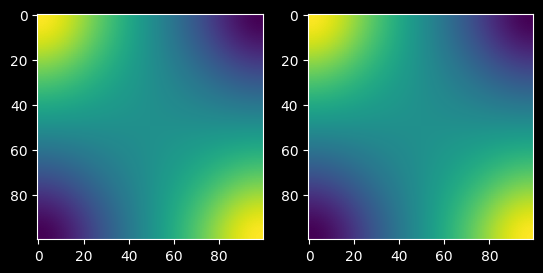

In [14]:
coeffs = ndimage.spline_filter(fvals)
newf2 = ndimage.map_coordinates(coeffs, coords, prefilter=False)

plt.style.use("dark_background")
plt.subplot(1,2,1)
plt.imshow(newf1)
plt.subplot(1,2,2)
plt.imshow(newf2)
plt.show()

### `scipy.integrate`

In [ ]:
# TODO integration usage

### `scipy.interpolation`: Interpolation of an N-D curve

The scipy.interpolate packages wraps the netlib FITPACK routines
(Dierckx) for calculating smoothing splines for various kinds of data
and geometries. Although the data is evenly spaced in this example, it
need not be so to use this routine.

In [ ]:
from numpy import cos, linspace, pi, sin, random
from scipy.interpolate import splprep, splev
from matplotlib import pyplot

# make ascending spiral in 3-space
t=linspace(0,1.75*2*pi,100)

x = sin(t)
y = cos(t)
z = t

# add noise
x+= random.normal(scale=0.1, size=x.shape)
y+= random.normal(scale=0.1, size=y.shape)
z+= random.normal(scale=0.1, size=z.shape)

# spline parameters
s=3.0 # smoothness parameter
k=2 # spline order
nest=-1 # estimate of number of knots needed (-1 = maximal)

# find the knot points
tckp, u = splprep([x,y,z],s=s,k=k,nest=-1)

# evaluate spline, including interpolated points
xnew,ynew,znew = splev(linspace(0,1,400),tckp)

#import pylab

pyplot.subplot(2,2,1)
data,=pyplot.plot(x,y,'bo-',label='data')
fit,=pyplot.plot(xnew,ynew,'r-',label='fit')
pyplot.legend()
pyplot.xlabel('x')
pyplot.ylabel('y')

pyplot.subplot(2,2,2)
data,=pyplot.plot(x,z,'bo-',label='data')
fit,=pyplot.plot(xnew,znew,'r-',label='fit')
pyplot.legend()
pyplot.xlabel('x')
pyplot.ylabel('z')

pyplot.subplot(2,2,3)
data,=pyplot.plot(y,z,'bo-',label='data')
fit,=pyplot.plot(ynew,znew,'r-',label='fit')
pyplot.legend()
pyplot.xlabel('y')
pyplot.ylabel('z')
plt.show()

### `scipy.linalg`: Linear Algebra, eigenvectors and such

#### Eigenvectors and EigenValues

In [15]:
import numpy as np
from scipy.linalg import eig, decomp, matfuncs

# Define a square matrix
matrix = np.array([[4, -2],
                   [1,  1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(matrix)

# Print the results
print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)



Eigenvalues:
[3.+0.j 2.+0.j]
Eigenvectors:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


#### `solve()` for n x n linear equations

In [16]:
import numpy as np
from scipy.linalg import solve

# Define the linear system of equations Ax = b
A = np.array([[3, 2], [1, 4]])
b = np.array([6, 8])

# Solve for x
x = solve(A, b)

# Print the solution
print("Solution for x:", x)

Solution for x: [0.8 1.8]


### `scipy.odr`

### `scipy.optimize`: Optimization

SciPy's optimization package is scipy.optimize. The most basic
non-linear optimization functions are:

* `optimize.fmin(func, x0)`, which finds the minimum of func(x) starting x with x0 (x can be a vector)
* `optimize.fsolve(func, x0)`, which finds a solution to func(x) = 0 starting with x = x0 (x can be a vector)
* `optimize.fminbound(func, x1, x2)`, which finds the minimum of a scalar function func(x) for the range [x1,x2] (x1,x2 must be a scalar and func(x) must return a scalar)

See the [scipy.optimze documentation](http://docs.scipy.org/doc/scipy/reference/optimize.html) for details.

This is a quick demonstration of generating data from several Bessel
functions and finding some local maxima using fminbound. This uses ipython with the -pylab switch.

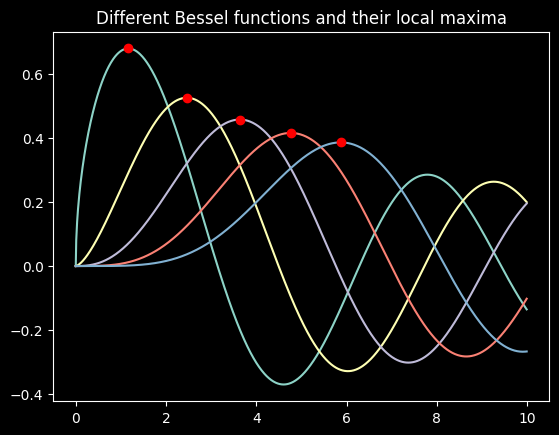

In [24]:
from numpy import arange
from matplotlib.pyplot import plot, title, show
from scipy import optimize, special

x = arange(0,10,0.01)

for k in arange(0.5,5.5):
     y = special.jv(k,x)
     plot(x,y)
     f = lambda x: -special.jv(k,x)
     x_max = optimize.fminbound(f,0,6)
     plot([x_max], [special.jv(k,x_max)],'ro')

title('Different Bessel functions and their local maxima')
show()
from numpy import r_, sin

### `scipy.signal`

The `scipy.signal` module in **SciPy** is widely used for signal processing tasks. Beyond cubic spline interpolation (e.g., `cspline`), some of its most common applications include:
1. **Filtering**
- **Design filters**: Create various filters such as FIR, IIR, Butterworth, Chebyshev, and Bessel filters.
    - Example: `butter()`, `cheby1()`, `bessel()`

- **Apply filters**: Filter signals using functions like `lfilter()` and `filtfilt()` for 1-D filtering.
    - `filtfilt()` is particularly used for zero phase filtering.

2. **Convolution and Correlation**
- Compute convolution and correlate signals using `convolve()`, `correlate()`, and `fftconvolve()` for signal processing tasks.
- Cross-correlation is useful in template matching and signal similarity analysis.

3. **Spectral Analysis**
- Work with power spectral density and spectrograms.
- Use **periodograms** and Welch's method (`periodogram()`, `welch()`) for frequency domain analysis.

4. **Processing Spectral Filters**
- Process and design digital and analog filter banks.
- Use functions like `freqz()` and `sosfreqz()` to analyze a filter’s frequency response.

5. **Finding Peaks**
- Locate peaks in signals with `find_peaks()` and related utilities. Useful in ECG analysis, stock price data peaks, etc.
- Automate and fine-tune peak detection parameters (e.g., prominence, threshold, and width).

6. **Wavelets and Transforms**
- Waveform transformations such as Continuous Wavelet Transforms (CWT) for signal compression or feature extraction.
- This is particularly useful in ECG or EEG signal processing.

7. **Impulse Response Analysis**
- Compute the impulse response of systems, focused on control systems and linear time-invariant (LTI) systems.
- Use `impulse()` or `dlti.impulse()` for LTI system analysis.

8. **Resampling**
- Resample signal data at different rates with interpolation using `resample()` or `resample_poly()`.
- Polyphase filtering is often used for efficient interpolation.

9. **Window Functions**
- Use window functions like `hamming()`, `hann()`, `blackman()` for smoothing in the frequency domain.
- Apply these windows in FFT analysis or spectral computations.

10. **Z-Transform and System Analysis**
- Polynomials and Z-transform for defining system behavior.
- Functions like `tf2zpk()` convert transfer functions into zero-pole representation.

11. **Continuous and Discrete Systems**
- Design and analyze discrete and continuous transfer functions, including state-space representations.


#### Filtering signals

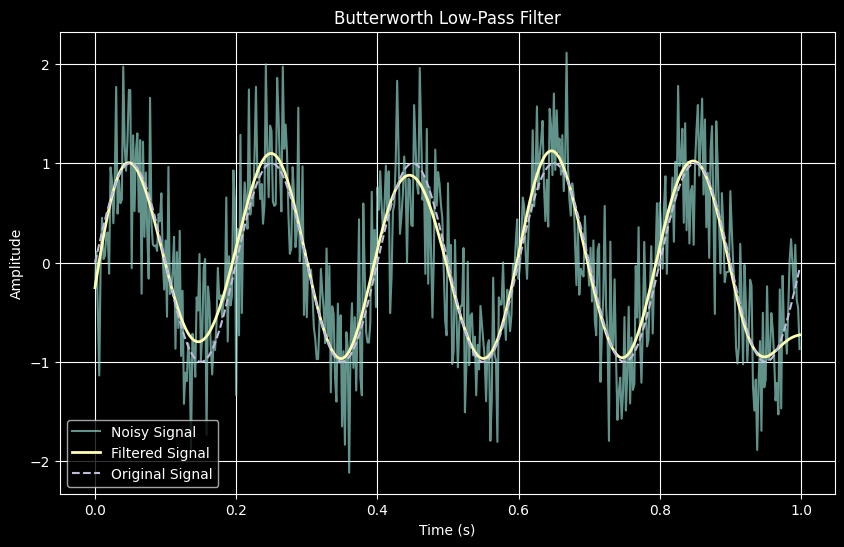

In [26]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Generate a noisy sine wave signal
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
freq = 5  # Frequency of the sine wave
signal = np.sin(2 * np.pi * freq * t)  # Sine wave
noise = np.random.normal(0, 0.5, signal.shape)  # Add random noise
noisy_signal = signal + noise

# Design a low-pass Butterworth filter
cutoff = 10  # Cutoff frequency in Hz
order = 4  # Filter order
b, a = butter(order, cutoff / (0.5 * fs), btype='low')  # Normalized frequency (Nyquist)

# Apply the filter
filtered_signal = filtfilt(b, a, noisy_signal)

# Plot the original noisy and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.7)
plt.plot(t, filtered_signal, label="Filtered Signal", linewidth=2)
plt.plot(t, signal, label="Original Signal", linestyle='dashed')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Butterworth Low-Pass Filter")
plt.grid(True)
plt.show()

#### `convolve`

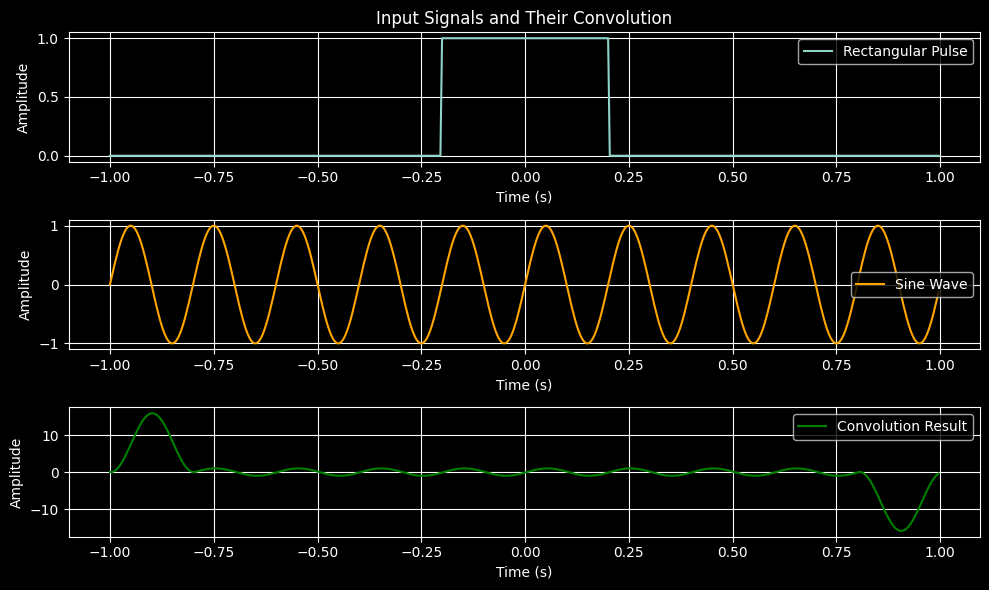

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Create a sample rectangular pulse signal
t = np.linspace(-1, 1, 500, endpoint=False)
rect_pulse = np.where(np.abs(t) < 0.2, 1, 0)

# Create a sine wave signal
sine_wave = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

# Perform convolution of the signals
conv_result = convolve(rect_pulse, sine_wave, mode='same')

# Plot the signals and the convolved result
plt.figure(figsize=(10, 6))

# Rectangular pulse
plt.subplot(3, 1, 1)
plt.plot(t, rect_pulse, label="Rectangular Pulse")
plt.legend()
plt.grid()
plt.title("Input Signals and Their Convolution")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Sine wave
plt.subplot(3, 1, 2)
plt.plot(t, sine_wave, label="Sine Wave", color='orange')
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Convolved result
plt.subplot(3, 1, 3)
plt.plot(t, conv_result, label="Convolution Result", color='green')
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


#### Using B-splines in scipy.signal

Example showing how to use B-splines in scipy.signal to do
interpolation. The input points must be equally spaced to use these
routine.

In [ ]:
from scipy.signal import cspline1d, cspline1d_eval

x = r_[0:10]
dx = x[1]-x[0]
newx = r_[-3:13:0.1]  # notice outside the original domain
y = sin(x)
cj = cspline1d(y)
newy = cspline1d_eval(cj, newx, dx=dx,x0=x[0])
plot(newx, newy, x, y, 'o')
show()



### `scipy.sparse`

### `scipy.spatial`

### Miscellaneous: `scipy.datasets`, `scipy.special`, `scipy.cluster`

In [ ]:
from scipy.datasets import ascent, face, electrocardiogram
import matplotlib.pyplot as plt

plt.rcdefaults()

# Load the "ascent" test image
ascent_image = ascent()

# Load the "face" test image
face_image = face()

electro = electrocardiogram()

# Plot both images
#fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display ascent image
#ax[0].imshow(ascent_image, cmap="gray")

# print(plt.style.available)

plt.style.use("dark_background")
#plt.style.use("classic")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
#plt.imshow(ascent_image, cmap="gray", alpha=1.0)
plt.imshow(ascent_image)
plt.title("Ascent Image")
plt.axis("off")

plt.subplot(1, 2, 2)
# Display face image
#plt.imshow(face_image, cmap="magma", alpha=1.0)
plt.imshow(face_image)
plt.title("Face Image")
plt.axis("off")

# ax[].axis("off")  # Leave the last axis empty to maintain alignment
# plt.tight_layout()
plt.show()

# Plot electrocardiogram
plt.plot(electro, color="blue")
plt.title("Electro-Cardiogram")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid(True)

plt.show()


## Using `pint` to control Units, Quantities

In [ ]:
from pint import UnitRegistry

# Create a UnitRegistry
ureg = UnitRegistry()

# Define quantities with units
distance = 5 * ureg.meter
time = 10 * ureg.second

# Perform calculations
speed = distance / time
print(f"Speed: {speed}")  # Speed: 0.5 meter / second

# Convert to a different unit
speed_in_kmh = speed.to(ureg.kilometer / ureg.hour)
print(f"Speed in km/h: {speed_in_kmh}")  # Speed in km/h: 1.8 kilometer / hour
